In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy.optimize import curve_fit

In [51]:
data = pd.read_csv('data.csv')

In [52]:
k = 0.10023
deltar = 3.95
mearth = 5.972e24
G = 6.67e-11
rearth = 6.371009e6

In [53]:
def rad(dg):
    return abs(-2 * deltar * G * mearth / dg) ** (1/3)

In [54]:
data['deltag'] = data.value * k * 1e-5

In [55]:
data['radius'] = rad(data.deltag)

In [56]:
data

,floor,value,time,deltag,radius
0,2,843,10:12,0.000845,1.550062e+06
1,3,832,10:18,0.000834,1.556864e+06
2,4,820,10:23,0.000822,1.564421e+06
3,5,808,10:26,0.000810,1.572128e+06
4,6,797,10:30,0.000799,1.579328e+06
5,7,786,10:33,0.000788,1.586661e+06
6,8,774,10:35,0.000776,1.594819e+06
7,9,763,10:38,0.000765,1.602446e+06
8,10,750,10:41,0.000752,1.611652e+06
9,11,737,10:44,0.000739,1.621073e+06


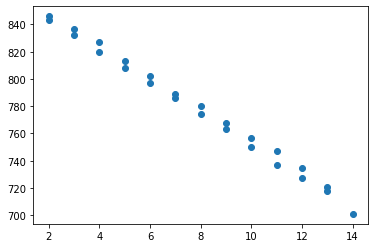

In [57]:
plt.scatter(data.floor, data.value)

In [58]:
def f(x, m, b):
    return m*x + b

In [59]:
popt, pcov = curve_fit(f, data.floor, data.deltag)

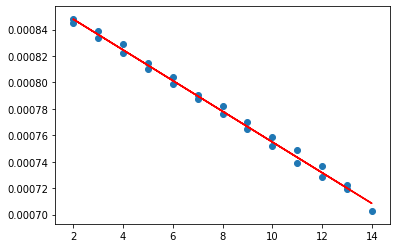

In [60]:
plt.plot(data.floor, f(data.floor, *popt), c='r')
plt.scatter(data.floor, data.deltag)

In [61]:
pred = rad(popt[0])
pred

6471844.9143028045

In [62]:
(pred - rearth) 

100835.91430280451

In [63]:
np.sqrt(np.diag(pcov))[0] / popt[0] * pred

-103873.7643522353